<a href="https://colab.research.google.com/github/JuanPabloJP/Data-Mining-on-R/blob/main/Mineria_de_Datos_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
#install.packages('rpart')
library(rpart)
#install.packages('rpart.plot')
library(rpart.plot)
#install.packages('caret')
library(caret)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [ ]:
datos = read.csv('/content/CarPrice_Assignment.csv')
datos_2 = datos %>% select(enginesize, horsepower, carwidth, curbweight)
datos_2

enginesize,horsepower,carwidth,curbweight
<int>,<int>,<dbl>,<int>
130,111,64.1,2548
130,111,64.1,2548
152,154,65.5,2823
109,102,66.2,2337
136,115,66.4,2824
136,110,66.3,2507
136,110,71.4,2844
136,110,71.4,2954
131,140,71.4,3086


In [ ]:
tree1 = rpart(datos$price~.,data=datos_2)
tree1

n= 205 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 205 13019640000 13276.710  
   2) enginesize< 182 187  3898358000 11255.670  
     4) curbweight< 2659.5 126   762661200  8731.770  
       8) curbweight< 2291.5 73   101506200  7276.534 *
       9) curbweight>=2291.5 53   293632300 10736.150 *
     5) curbweight>=2659.5 61   675179700 16468.970  
      10) carwidth< 68.6 53   488541600 15879.850 *
      11) carwidth>=68.6 8    46382600 20371.880 *
   3) enginesize>=182 18   422201400 34273.080 *

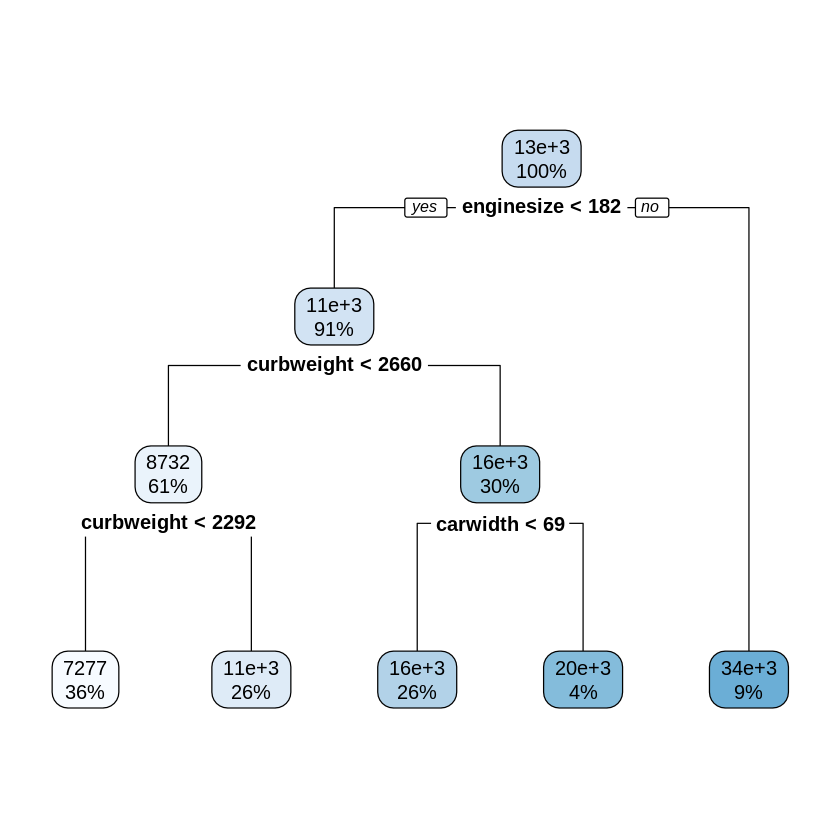

In [ ]:
rpart.plot(tree1)

In [ ]:
set.seed(43)

datos$Marca <- word(datos$CarName,1)
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "vw", "volkswagen"))
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "vokswagen", "volkswagen"))
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "porcshce", "porsche"))
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "toyouta", "toyota"))
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "Nissan", "nissan"))
datos <- datos %>% mutate(Marca = replace(Marca, Marca == "maxda", "mazda"))
datos <- datos %>% mutate(marca=replace(marca, marca=="alfa-romero", "alfa-romeo"))
datos <- datos %>% mutate(marca=replace(marca, marca=="mazd", "mazda"))

datos_entrenamiento <- sample_frac(datos, .7)

datos_prueba <- setdiff(datos,datos_entrenamiento)

In [ ]:
dim(datos_entrenamiento)

[1] 144  27

In [ ]:
dim(datos_prueba)

[1] 61 27

In [ ]:
X_train = datos_entrenamiento %>% select(enginesize, horsepower, carwidth, curbweight)
X_test = datos_prueba %>% select(enginesize, horsepower, carwidth, curbweight)
y_train = datos_entrenamiento$price
y_test = datos_prueba$price

In [ ]:
tree2 = rpart(y_train~.,X_train)

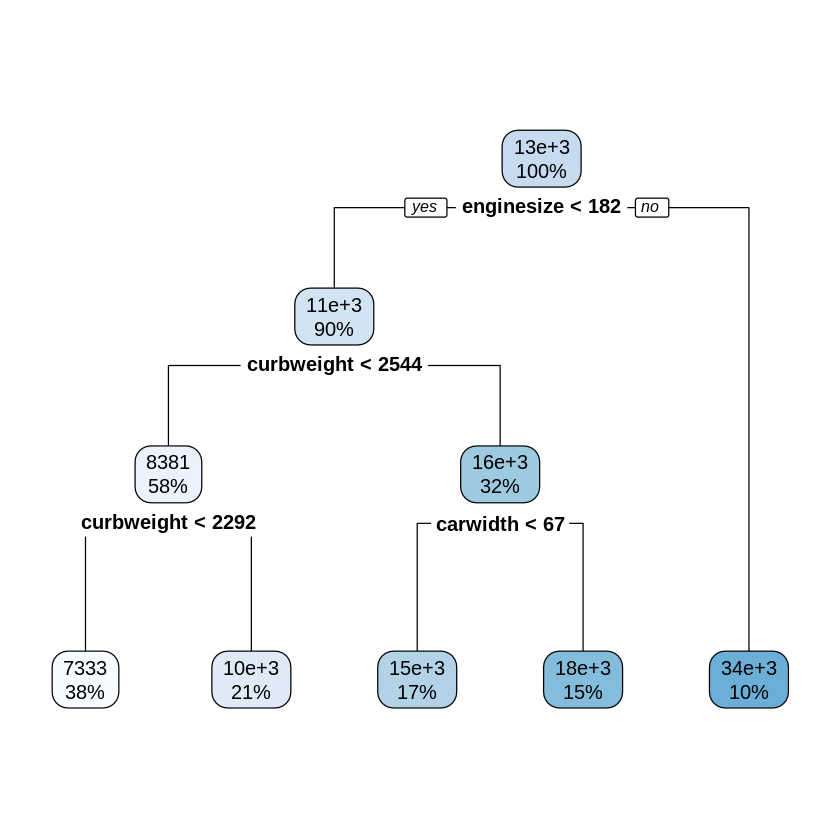

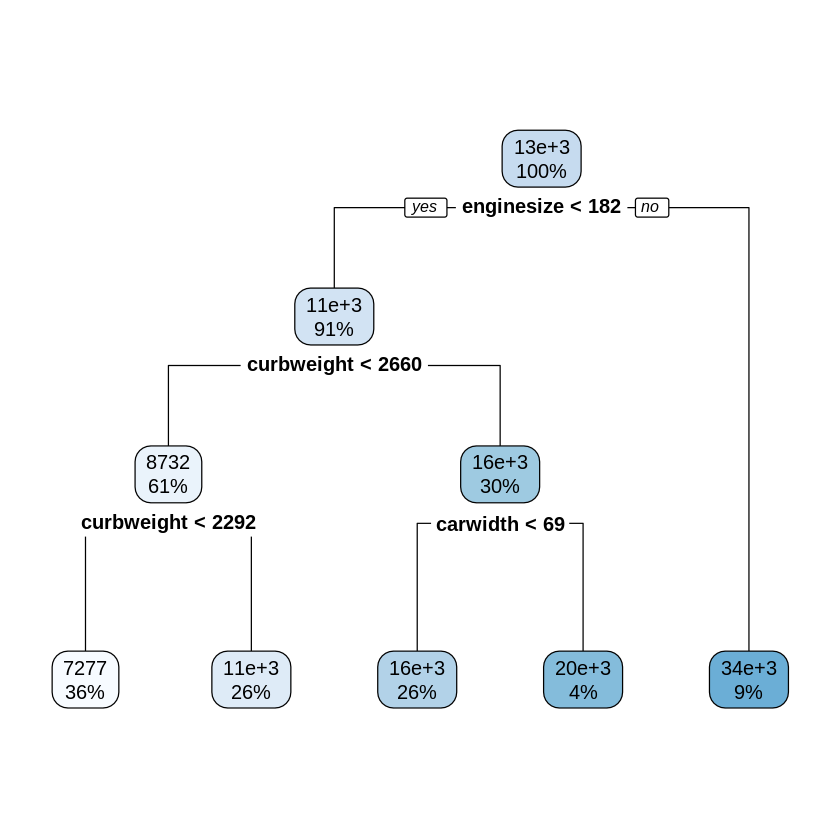

In [ ]:
rpart.plot(tree2)
rpart.plot(tree1)

In [ ]:
y_predict = predict(tree2,X_test)
m = length(y_predict)
sqrt(1/m*sum((y_test-y_predict)^2))

[1] 2870.623

In [ ]:
marcas = datos_prueba$Marca
group_predict = aggregate(y_predict,by = list(datos_prueba$Marca), FUN=mean)
group_test = aggregate(datos_prueba$price,by = list(datos_prueba$Marca), FUN=mean)

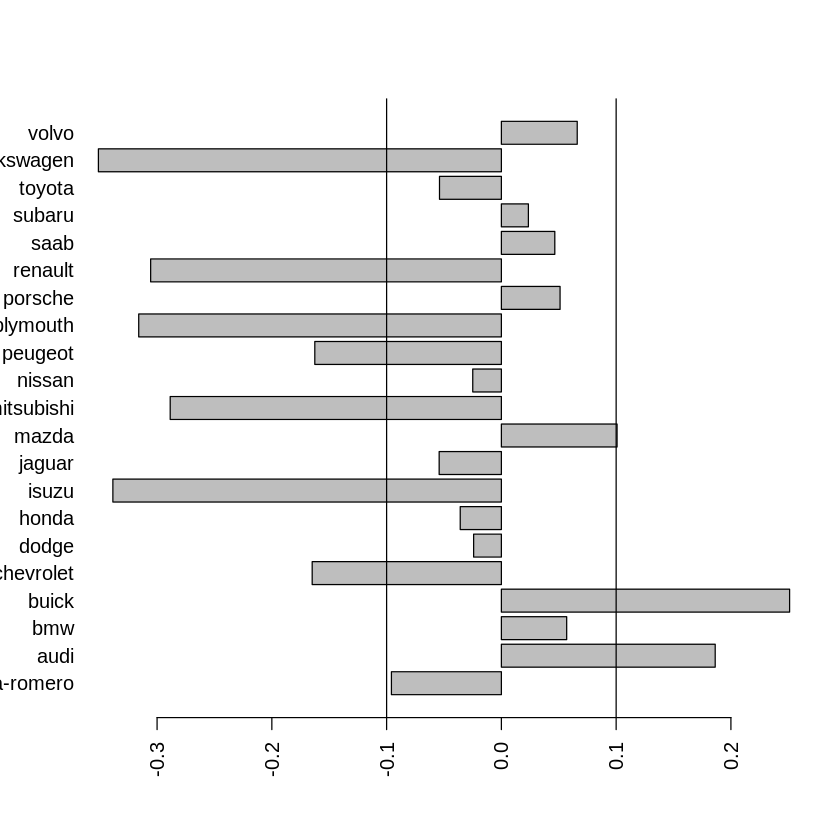

In [ ]:
diferencia = (group_test$x-group_predict$x)/group_test$x

barplot(diferencia,names = group_test$`Group.1`,horiz = TRUE, las=2)
abline(v=0.1)
abline(v=-0.1)

In [ ]:
datos_prueba

car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,⋯,mpfi,3.47,2.680,9.0,111,5000,21,27,13495.00,alfa-romero
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.400,10.0,102,5500,24,30,13950.00,audi
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,⋯,mpfi,3.19,3.400,8.5,110,5500,19,25,15250.00,audi
10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,⋯,mpfi,3.13,3.400,7.0,160,5500,16,22,17859.17,audi
13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,⋯,mpfi,3.31,3.190,9.0,121,4250,21,28,20970.00,bmw
16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,⋯,mpfi,3.62,3.390,8.0,182,5400,16,22,30760.00,bmw
20,1,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,⋯,2bbl,3.03,3.110,9.6,70,5400,38,43,6295.00,chevrolet
25,1,dodge monaco (sw),gas,std,four,hatchback,fwd,front,93.7,⋯,2bbl,2.97,3.230,9.4,68,5500,31,38,6229.00,dodge
26,1,dodge colt hardtop,gas,std,four,sedan,fwd,front,93.7,⋯,2bbl,2.97,3.230,9.4,68,5500,31,38,6692.00,dodge


In [ ]:
library(dplyr)
filtro_carros = filter(datos_prueba, grepl('nissan|toyota|mitsubishi',datos_prueba$CarName))
filtro_carros



def separar_nombre(carro):
    splt = carro.split(' ',1)
    marca = splt[0].replace('vw','volkswagen').replace('vokswagen','volkswagen').lower()
    modelo = splt[-1]
    return marca, modelo

cars['brand'] = cars.CarName.apply(lambda x:separar_nombre(x)[0])
cars['model'] = cars.CarName.apply(lambda x:separar_nombre(x)[1])


ERROR: ignored

In [ ]:
nombres <- substr(datos_prueba$CarName,1,6)
lapply(strsplit(datos$CarName, split = " "), `[[`, 1)

[[1]]
[1] "alfa-romero"

[[2]]
[1] "alfa-romero"

[[3]]
[1] "alfa-romero"

[[4]]
[1] "audi"

[[5]]
[1] "audi"

[[6]]
[1] "audi"

[[7]]
[1] "audi"

[[8]]
[1] "audi"

[[9]]
[1] "audi"

[[10]]
[1] "audi"

[[11]]
[1] "bmw"

[[12]]
[1] "bmw"

[[13]]
[1] "bmw"

[[14]]
[1] "bmw"

[[15]]
[1] "bmw"

[[16]]
[1] "bmw"

[[17]]
[1] "bmw"

[[18]]
[1] "bmw"

[[19]]
[1] "chevrolet"

[[20]]
[1] "chevrolet"

[[21]]
[1] "chevrolet"

[[22]]
[1] "dodge"

[[23]]
[1] "dodge"

[[24]]
[1] "dodge"

[[25]]
[1] "dodge"

[[26]]
[1] "dodge"

[[27]]
[1] "dodge"

[[28]]
[1] "dodge"

[[29]]
[1] "dodge"

[[30]]
[1] "dodge"

[[31]]
[1] "honda"

[[32]]
[1] "honda"

[[33]]
[1] "honda"

[[34]]
[1] "honda"

[[35]]
[1] "honda"

[[36]]
[1] "honda"

[[37]]
[1] "honda"

[[38]]
[1] "honda"

[[39]]
[1] "honda"

[[40]]
[1] "honda"

[[41]]
[1] "honda"

[[42]]
[1] "honda"

[[43]]
[1] "honda"

[[44]]
[1] "isuzu"

[[45]]
[1] "isuzu"

[[46]]
[1] "isuzu"

[[47]]
[1] "isuzu"

[[48]]
[1] "jaguar"

[[49]]
[1] "jaguar"

[[50]]
[1] "jaguar"

[[51]]
[1] "maxda"

[[52]]
[1] "maxda"

[[53]]
[1] "mazda"

[[54]]
[1] "mazda"

[[55]]
[1] "mazda"

[[56]]
[1] "mazda"

[[57]]
[1] "mazda"

[[58]]
[1] "mazda"

[[59]]
[1] "mazda"

[[60]]
[1] "mazda"

[[61]]
[1] "mazda"

[[62]]
[1] "mazda"

[[63]]
[1] "mazda"

[[64]]
[1] "mazda"

[[65]]
[1] "mazda"

[[66]]
[1] "mazda"

[[67]]
[1] "mazda"

[[68]]
[1] "buick"

[[69]]
[1] "buick"

[[70]]
[1] "buick"

[[71]]
[1] "buick"

[[72]]
[1] "buick"

[[73]]
[1] "buick"

[[74]]
[1] "buick"

[[75]]
[1] "buick"

[[76]]
[1] "mercury"

[[77]]
[1] "mitsubishi"

[[78]]
[1] "mitsubishi"

[[79]]
[1] "mitsubishi"

[[80]]
[1] "mitsubishi"

[[81]]
[1] "mitsubishi"

[[82]]
[1] "mitsubishi"

[[83]]
[1] "mitsubishi"

[[84]]
[1] "mitsubishi"

[[85]]
[1] "mitsubishi"

[[86]]
[1] "mitsubishi"

[[87]]
[1] "mitsubishi"

[[88]]
[1] "mitsubishi"

[[89]]
[1] "mitsubishi"

[[90]]
[1] "Nissan"

[[91]]
[1] "nissan"

[[92]]
[1] "nissan"

[[93]]
[1] "nissan"

[[94]]
[1] "nissan"

[[95]]
[1] "nissan"

[[96]]
[1] "nissan"

[[97]]
[1] "nissan"

[[98]]
[1] "nissan"

[[99]]
[1] "nissan"

[[100]]
[1] "nissan"

[[101]]
[1] "nissan"

[[102]]
[1] "nissan"

[[103]]
[1] "nissan"

[[104]]
[1] "nissan"

[[105]]
[1] "nissan"

[[106]]
[1] "nissan"

[[107]]
[1] "nissan"

[[108]]
[1] "peugeot"

[[109]]
[1] "peugeot"

[[110]]
[1] "peugeot"

[[111]]
[1] "peugeot"

[[112]]
[1] "peugeot"

[[113]]
[1] "peugeot"

[[114]]
[1] "peugeot"

[[115]]
[1] "peugeot"

[[116]]
[1] "peugeot"

[[117]]
[1] "peugeot"

[[118]]
[1] "peugeot"

[[119]]
[1] "plymouth"

[[120]]
[1] "plymouth"

[[121]]
[1] "plymouth"

[[122]]
[1] "plymouth"

[[123]]
[1] "plymouth"

[[124]]
[1] "plymouth"

[[125]]
[1] "plymouth"

[[126]]
[1] "porsche"

[[127]]
[1] "porcshce"

[[128]]
[1] "porsche"

[[129]]
[1] "porsche"

[[130]]
[1] "porsche"

[[131]]
[1] "renault"

[[132]]
[1] "renault"

[[133]]
[1] "saab"

[[134]]
[1] "saab"

[[135]]
[1] "saab"

[[136]]
[1] "saab"

[[137]]
[1] "saab"

[[138]]
[1] "saab"

[[139]]
[1] "subaru"

[[140]]
[1] "subaru"

[[141]]
[1] "subaru"

[[142]]
[1] "subaru"

[[143]]
[1] "subaru"

[[144]]
[1] "subaru"

[[145]]
[1] "subaru"

[[146]]
[1] "subaru"

[[147]]
[1] "subaru"

[[148]]
[1] "subaru"

[[149]]
[1] "subaru"

[[150]]
[1] "subaru"

[[151]]
[1] "toyota"

[[152]]
[1] "toyota"

[[153]]
[1] "toyota"

[[154]]
[1] "toyota"

[[155]]
[1] "toyota"

[[156]]
[1] "toyota"

[[157]]
[1] "toyota"

[[158]]
[1] "toyota"

[[159]]
[1] "toyota"

[[160]]
[1] "toyota"

[[161]]
[1] "toyota"

[[162]]
[1] "toyota"

[[163]]
[1] "toyota"

[[164]]
[1] "toyota"

[[165]]
[1] "toyota"

[[166]]
[1] "toyota"

[[167]]
[1] "toyota"

[[168]]
[1] "toyota"

[[169]]
[1] "toyota"

[[170]]
[1] "toyota"

[[171]]
[1] "toyota"

[[172]]
[1] "toyota"

[[173]]
[1] "toyota"

[[174]]
[1] "toyota"

[[175]]
[1] "toyota"

[[176]]
[1] "toyota"

[[177]]
[1] "toyota"

[[178]]
[1] "toyota"

[[179]]
[1] "toyota"

[[180]]
[1] "toyota"

[[181]]
[1] "toyota"

[[182]]
[1] "toyouta"

[[183]]
[1] "vokswagen"

[[184]]
[1] "volkswagen"

[[185]]
[1] "volkswagen"

[[186]]
[1] "volk

In [ ]:
library(stringr)


car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,⋯,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>
44,0,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,⋯,2bbl,3.31,3.23,8.50,78,4800,24,29,6785.0,isuzu
40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,⋯,1bbl,3.15,3.58,9.00,86,5800,27,33,8845.0,honda
196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,⋯,mpfi,3.78,3.15,9.50,114,5400,23,28,13415.0,volvo
149,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,⋯,2bbl,3.62,2.64,9.00,82,4800,23,29,8013.0,subaru
66,0,mazda glc,gas,std,four,sedan,rwd,front,104.9,⋯,mpfi,3.76,3.16,8.00,120,5000,19,27,18280.0,mazda
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,⋯,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0,audi
184,2,volkswagen 1131 deluxe sedan,gas,std,two,sedan,fwd,front,97.3,⋯,mpfi,3.19,3.40,9.00,85,5250,27,34,7975.0,volkswagen
77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,⋯,2bbl,2.97,3.23,9.40,68,5500,37,41,5389.0,mitsubishi
7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,⋯,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0,audi
